<a href="https://colab.research.google.com/github/ncrowder/python/blob/main/Decision_Trees_%26_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Decision Trees

### Step 1 - Load Data

The *adult_train.csv* file is the training dataset. Run the following code cell to load the dataset.

In [95]:
import pandas as pd
adult_train_path = r'https://raw.githubusercontent.com/ncrowder/python/refs/heads/main/decision_trees/adult_train.csv'
df = pd.read_csv(adult_train_path)
df.head()

,Age,WorkClass,Fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Label
0,20,Private,30035,Assoc-acdm,12,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
1,22,Private,141297,Some-college,10,Never-married,Tech-support,Own-child,White,Male,0,0,40,United-States,<=50K
2,63,Private,440607,Preschool,1,Married-civ-spouse,Prof-specialty,Husband,Other,Male,0,0,30,Mexico,<=50K
3,32,Private,165949,Bachelors,13,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,1590,42,United-States,<=50K
4,36,Private,139743,Some-college,10,Widowed,Prof-specialty,Own-child,White,Female,0,0,40,United-States,<=50K


### Step 2 - Dataset Info

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15016 entries, 0 to 15015
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            15016 non-null  int64 
 1   WorkClass      15016 non-null  object
 2   Fnlwgt         15016 non-null  int64 
 3   Education      15016 non-null  object
 4   EducationNum   15016 non-null  int64 
 5   MaritalStatus  15016 non-null  object
 6   Occupation     15016 non-null  object
 7   Relationship   15016 non-null  object
 8   Race           15016 non-null  object
 9   Sex            15016 non-null  object
 10  CapitalGain    15016 non-null  int64 
 11  CapitalLoss    15016 non-null  int64 
 12  HoursPerWeek   15016 non-null  int64 
 13  NativeCountry  15016 non-null  object
 14  Label          15016 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.7+ MB


In [97]:
df.select_dtypes('object').describe()

,WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Sex,NativeCountry,Label
count,15016,15016,15016,15016,15016,15016,15016,15016,15016
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
freq,10694,4366,8864,2621,7870,13126,10980,13803,7508


In [98]:
df.describe()

,Age,Fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
count,15016.000000,1.501600e+04,15016.000000,15016.000000,15016.000000,15016.000000
mean,40.200386,1.884496e+05,10.611082,2045.919219,121.227158,42.599760
std,12.432960,1.044355e+05,2.580166,10368.504403,474.990588,11.810685
min,17.000000,1.487800e+04,1.000000,0.000000,0.000000,1.000000
25%,31.000000,1.174752e+05,9.000000,0.000000,0.000000,40.000000
50%,40.000000,1.769920e+05,10.000000,0.000000,0.000000,40.000000
75%,49.000000,2.356915e+05,13.000000,0.000000,0.000000,50.000000
max,90.000000,1.268339e+06,16.000000,99999.000000,3900.000000,99.000000


### Step 3 - Preparing the Features

Using subject matter expertise to choose features is critical in crafting the most valuable machine models. In the case of the *Adult Census* dataset, you can select features based on knowledge of the US economy. For example, certain factors (e.g., level of education) are highly associated with higher income levels.

The first model will be based on the hypothesis that older, more educated citizens in certain occupations have higher incomes by using the following features: *Age*, *EducationNum*, *Occupation*, and *HoursPerWeek*. As the *Occupation* feature is categorical, it will need to be one-hot encoded.

In [125]:
x = ['Age','EducationNum', 'Occupation', 'HoursPerWeek']
df_x = pd.get_dummies(df[x], columns=['Occupation'])
df_x.head()

,Age,EducationNum,HoursPerWeek,Occupation_Adm-clerical,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving
0,20,12,40,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,22,10,40,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,63,1,30,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,32,13,42,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,36,10,40,False,False,False,False,False,False,False,False,False,True,False,False,False,False


### Step 4 - Preparing the Labels

The dataset labels are strings that the classifer will encode "under the hood" anyway, but we do it here manually to demonstrate.

In [126]:
from sklearn.preprocessing import LabelEncoder

In [127]:
label_encoder = LabelEncoder()
df_y = label_encoder.fit_transform(df['Label'])
print(label_encoder.classes_)
print(df_y)

['<=50K' '>50K']
[0 0 0 ... 1 1 1]


### Step 5 - Training Your First Model

With the features and labels prepped, it is time to train your first model. The *min_samples_leaf* hyperparameter will be set to control the tree size. The *random_state* will also be set to a common value to ensure reproducibility. Type the following code into the blank code cell in your lab notebook and run it to produce the results.

In [128]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(min_samples_leaf = .05, max_depth = 4, random_state=123)
dt.fit(df_x,df_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.05, random_state=123)

### Step 6 - Visualizing Your First Model

One of the primary benefits of decision trees is that they are easily interpreted when visualized.

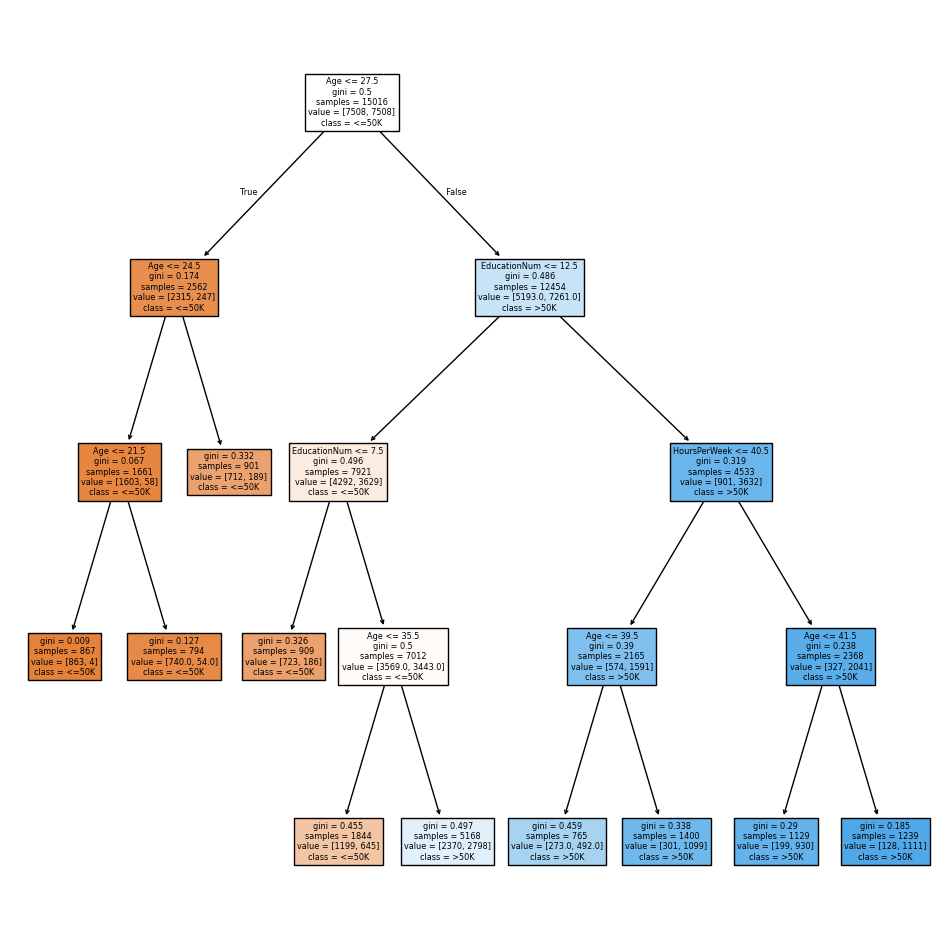

In [129]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plot_tree(dt,feature_names=df_x.columns,class_names=label_encoder.classes_, filled=True);

### Step 7 - Preparing Features for a 2nd Model

We may know that married couples in the US tend to have high incomes, and gender is also highly associated with income in the US. You can train a 2nd model to explore this refined hypothesis by adding the *MaritalStatus* and *Sex* features.

In [130]:
x = ['Age','EducationNum', 'Occupation', 'HoursPerWeek', 'Sex', 'MaritalStatus']
x_cat = ['MaritalStatus','Occupation','Sex']
df_x = pd.get_dummies(df[x], prefix = x_cat, columns = x_cat)
df_x.head()

,Age,EducationNum,HoursPerWeek,MaritalStatus_Divorced,MaritalStatus_Married-AF-spouse,MaritalStatus_Married-civ-spouse,MaritalStatus_Married-spouse-absent,MaritalStatus_Never-married,MaritalStatus_Separated,MaritalStatus_Widowed,...,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Sex_Female,Sex_Male
0,20,12,40,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
1,22,10,40,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
2,63,1,30,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,32,13,42,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,36,10,40,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


### Step 8 - Training a 2nd Model

Using the same parameters as above to make a comparison.

In [131]:
dt2 = DecisionTreeClassifier(min_samples_leaf = .05, max_depth = 4, random_state=123)
dt2.fit(df_x,df_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.05, random_state=123)

### Step 9 - Visualizing the 2nd Model

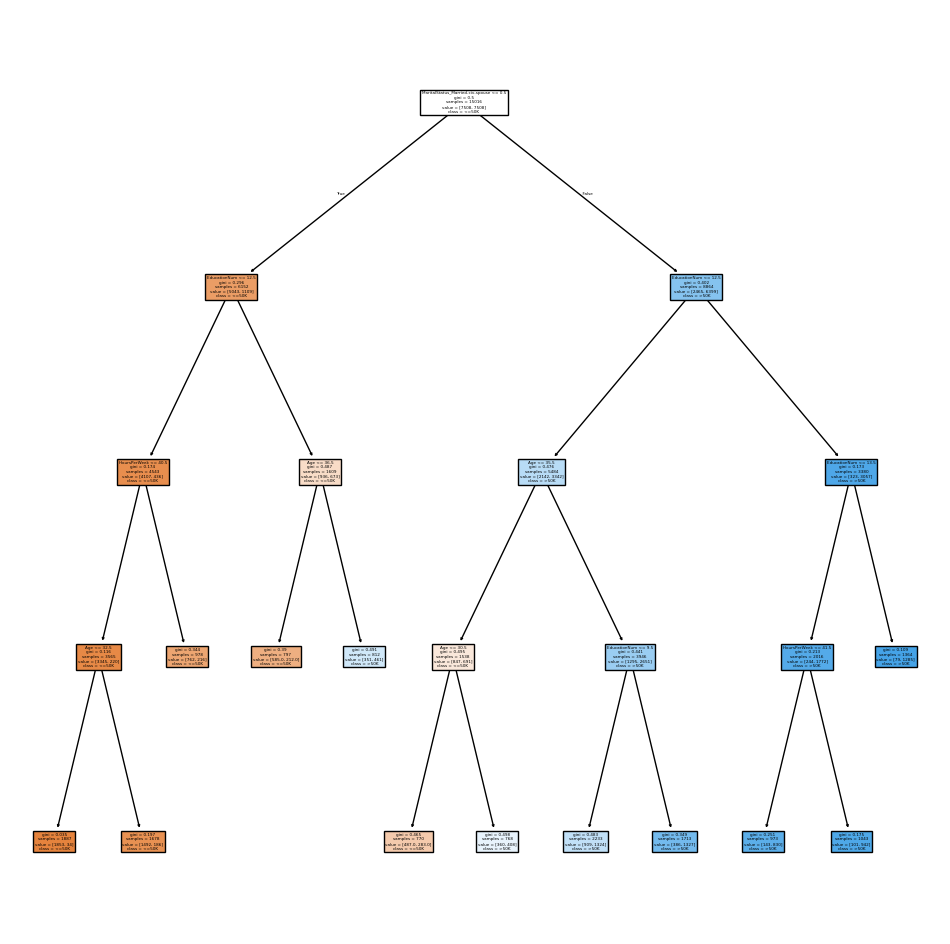

In [132]:
plt.figure(figsize=(12,12))
plot_tree(dt2,feature_names=df_x.columns,class_names=label_encoder.classes_, filled=True);

# Part 2 - Random Forests



### Step 1 - Prepare the Features

We will now expand the working hypotheses to include the *Race*, *CapitalGain*, and *CapitalLoss* features. The intuition is that *Race* is associated with income in the US economy, and the *CapitalGain* and *CapitalLoss* features are also associated with income.

In [133]:
x = ['Age','EducationNum', 'Occupation', 'HoursPerWeek', 'Sex', 'MaritalStatus', 'Race', 'CapitalGain','CapitalLoss']
x_cat = ['MaritalStatus','Occupation','Sex','Race']
df_x = pd.get_dummies(df[x], prefix = x_cat, columns = x_cat)
df_x.head()

,Age,EducationNum,HoursPerWeek,CapitalGain,CapitalLoss,MaritalStatus_Divorced,MaritalStatus_Married-AF-spouse,MaritalStatus_Married-civ-spouse,MaritalStatus_Married-spouse-absent,MaritalStatus_Never-married,...,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Sex_Female,Sex_Male,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,20,12,40,0,0,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,True
1,22,10,40,0,0,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
2,63,1,30,0,0,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
3,32,13,42,0,1590,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,36,10,40,0,0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


### Step 2 - Preparing the Labels

As with Part 1, we'll manually encode the target.

In [134]:
label_encoder = LabelEncoder()
df_y = label_encoder.fit_transform(df['Label'])
print(label_encoder.classes_)
print(df_y)

['<=50K' '>50K']
[0 0 0 ... 1 1 1]


### Step 3 - Train the Random Forest

As you have certainly noticed by now, the *scikit-learn* library was designed to enable repeating coding patterns regardless of the machine learning algorithm you use. For example, the *fit()* method is the same across the *DecisionTreeClassifier* and *RandomForestClassifer* classes.

In [109]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [135]:
rf = rfc(n_estimators = 200, oob_score=True, n_jobs = 1, random_state = 123) #200 trees, not limited here by max_depth or min_samples_leaf.
rf.fit(df_x,df_y)
print(f'Estimated accuracy with OOB data: {rf.oob_score_:.4f}')
print(f'Training data accuracy: {rf.score(df_x,df_y):.4f}') #score on the training set, we should use a test set here if we wanted a more honest appraisal

Estimated accuracy with OOB data: 0.8115
Training data accuracy: 0.9638


### Step 4 - Get OOB Predictions

OOB means "out of box" and it represents those pieces of data not selected for a particular tree. Think of OOB data as representing the unkownable future. Analyzing the predictive performance of a *RandomForestClassifier* in terms of OOB allows for estimating the quality of the model's future predictions. The first step is to build the predicted OOB labels.

In [136]:
oobs = pd.DataFrame(rf.oob_decision_function_, columns = label_encoder.classes_)
oobs['Label'] = 0
oobs.loc[oobs['>50K'] > .5, 'Label'] = 1
oobs

,<=50K,>50K,Label
0,1.000000,0.000000,0
1,0.971014,0.028986,0
2,0.605263,0.394737,0
3,0.815972,0.184028,0
4,0.945946,0.054054,0
...,...,...,...
15011,0.891228,0.108772,0
15012,0.130128,0.869872,1
15013,0.007143,0.992857,1
15014,0.259740,0.740260,1


### Step 5 - Analyzing the OOB Predictions

Using a *confusion matrix* to analyze OOB predictions gives you insights into how your *RandomForestClassifier* is performing. The confusion matrix allows you answer many questions about the nature of model predictions.

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

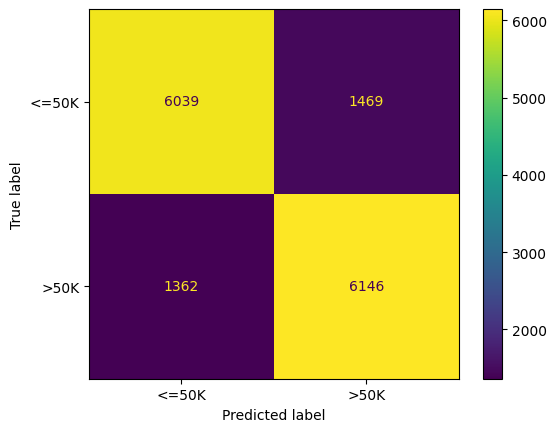

In [138]:
cm = confusion_matrix(df_y, oobs['Label'])
cmd = ConfusionMatrixDisplay(cm, display_labels = label_encoder.classes_)
cmd.plot()

## Part 3 - Feature Importance and Engineering

### Step 1 - Engineer the *Female* Feature

You have one-hot encoded the *Sex* categorical feature. This encoding produced two binary features - *Sex_Female* and *Sex_Male*. While these two features are reasonable for use in machine learning, they are not optimal. A better approach would be to engineer a single feature based on one of the categories. For example, a binary *Female* feature.

In [139]:
df['Female'] = df['Sex'].map({'Female':1, 'Male':0})
df.head()

,Age,WorkClass,Fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Label,Female
0,20,Private,30035,Assoc-acdm,12,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K,1
1,22,Private,141297,Some-college,10,Never-married,Tech-support,Own-child,White,Male,0,0,40,United-States,<=50K,0
2,63,Private,440607,Preschool,1,Married-civ-spouse,Prof-specialty,Husband,Other,Male,0,0,30,Mexico,<=50K,0
3,32,Private,165949,Bachelors,13,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,1590,42,United-States,<=50K,1
4,36,Private,139743,Some-college,10,Widowed,Prof-specialty,Own-child,White,Female,0,0,40,United-States,<=50K,1


### Step 2 - Prepare the Features

The following code prepares the features. Unlike the previous lab, the *Sex* feature no longer needs to be one-hot encoded because the new *Female* feature is already numeric.

In [140]:
x = ['Age','EducationNum', 'Occupation', 'HoursPerWeek', 'Female', 'MaritalStatus', 'Race', 'CapitalGain','CapitalLoss']
x_cat = ['MaritalStatus','Occupation','Race']
df_x = pd.get_dummies(df[x], prefix = x_cat, columns = x_cat)
df_x.head()

,Age,EducationNum,HoursPerWeek,Female,CapitalGain,CapitalLoss,MaritalStatus_Divorced,MaritalStatus_Married-AF-spouse,MaritalStatus_Married-civ-spouse,MaritalStatus_Married-spouse-absent,...,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,20,12,40,1,0,0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,22,10,40,0,0,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,63,1,30,0,0,0,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
3,32,13,42,1,0,1590,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,36,10,40,1,0,0,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


### Step 3 - Preparing the Labels

In [141]:
label_encoder = LabelEncoder()
df_y = label_encoder.fit_transform(df['Label'])
print(label_encoder.classes_)
print(df_y)

['<=50K' '>50K']
[0 0 0 ... 1 1 1]


### Step 4 - Train the Random Forest

In [142]:
rf = rfc(n_estimators = 200, oob_score=True, n_jobs = -1, random_state = 123)
rf.fit(df_x,df_y)
print(f'Estimated accuracy with OOB data: {rf.oob_score_:.4f}')
print(f'Training data accuracy: {rf.score(df_x,df_y):.4f}') # score on the training set, we should use a test set here if we wanted a more honest appraisal

Estimated accuracy with OOB data: 0.8127
Training data accuracy: 0.9638


### Step 5 - Feature Importance

As discussed in lecture, permutation importance is one way to determine feature importance.  It is rather compute-intensive.

In [143]:
from sklearn.inspection import permutation_importance

In [144]:
imp = permutation_importance(rf, df_x, df_y, n_repeats = 5, n_jobs = 1, random_state = 123)
sorted_idx = imp.importances_mean.argsort()
importance_dict = {'Feature': df_x.columns.values[sorted_idx], 'Importance': imp.importances_mean[sorted_idx]}
imp_df = pd.DataFrame(importance_dict)
imp_df.sort_values('Importance',ascending=False)

,Feature,Importance
31,Age,0.148628
30,EducationNum,0.140290
29,MaritalStatus_Married-civ-spouse,0.122616
28,HoursPerWeek,0.104768
27,CapitalGain,0.066103
26,Female,0.045645
25,Occupation_Exec-managerial,0.027957
24,Occupation_Prof-specialty,0.024627
23,MaritalStatus_Never-married,0.022216
22,CapitalLoss,0.018487


# Part 4 - Model Testing

### Step 1 - Load Test Data

In [145]:
df_test_path = r'https://raw.githubusercontent.com/ncrowder/python/refs/heads/main/decision_trees/adult_test.csv'
df_test = pd.read_csv(df_test_path)
df_test.head()

,Age,WorkClass,Fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Label
0,32,Private,185820,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Black,Female,0,0,40,Trinadad&Tobago,<=50K
1,34,Private,122749,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,32,Trinadad&Tobago,<=50K
2,20,Private,117476,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,Trinadad&Tobago,<=50K
3,36,Private,185692,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,35,Trinadad&Tobago,<=50K
4,73,Private,88594,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,35,Trinadad&Tobago,<=50K


### Step 2 - Prepare the Test Data Features

A trained machine learning model requires the test *DataFrame* to have columns that match those used to train the model. Any data cleaning or feature engineering performed on the training *DataFrame* has to be applied to the test dataset.

In [123]:
df_test['Female'] = df_test['Sex'].map({'Female':1, 'Male':0})
df_test_x = pd.get_dummies(df_test[x], prefix = x_cat, columns = x_cat)
df_test_x

,Age,EducationNum,HoursPerWeek,Female,CapitalGain,CapitalLoss,MaritalStatus_Divorced,MaritalStatus_Married-AF-spouse,MaritalStatus_Married-civ-spouse,MaritalStatus_Married-spouse-absent,...,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,32,13,40,1,0,0,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,34,10,32,0,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,20,10,40,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,36,4,35,0,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,73,9,35,1,0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,28,15,50,0,0,0,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
7396,56,9,40,0,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
7397,41,15,45,0,0,0,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
7398,37,14,40,0,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


### Step 3 - Preparing the Test Labels

Now we'll prepare the test set labels to match the training dataset's labels as before. The easiest way to achieve this is to use the existing *LabelEncoder* object created previously using the *transform()* method instead of *fit_transform()*.

In [59]:
df_test_y = label_encoder.transform(df_test['Label'])

### Step 4 - Making Predictions

The *RandomForestClassifier* offers the *predict()* method to make predictions for a dataset. In this case, predictions for the test dataset. Type the following code into the blank code cell in your lab notebook and run it to produce the results.

In [60]:
test_preds = rf.predict(df_test_x)

### Step 5 - Evaluating the Model

As discussed during the lecture, the final step of any machine learning project is evaluating the model's predictive performance against the test data. The goal is to ascertain how likely the model is to meet business requirements in the future.

Test dataset accuracy:  0.8080


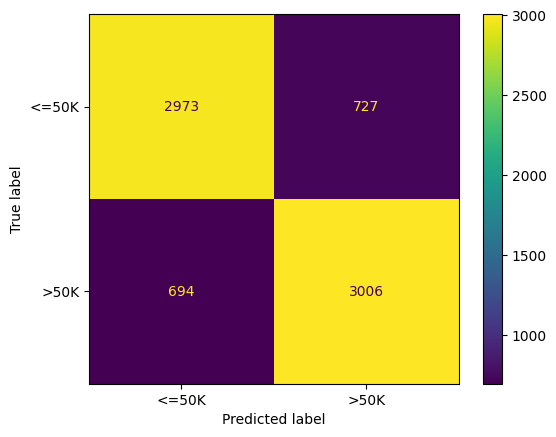

In [124]:
print(f'Test dataset accuracy: {rf.score(df_test_x, df_test_y): .4f}')
cm = confusion_matrix(df_test_y,test_preds)
cmd = ConfusionMatrixDisplay(cm,display_labels = label_encoder.classes_)
cmd.plot()

# Your Turn

Exercise #1: remove the bottom 4 features according to permutation importance calculated previously on the *training set* and then retrain and refit a random forest (call it rf2).

Then calculate the OOB accuracy as well as the accuracy on the test data set.

What are the features for the 100th row of the test dataset and what is the prediction?  Is it accurate?

In [ ]:
#Excerise 1 (add as many cells as needed)

Exercise #2: combine the test and train datasets together (maybe use *concat*) and perform a standard train_test split at the typical 80:20 ratio.  Then train a random forest on the features from parts 3 and 4 (call it rf3).

Then calculate the OOB accuracy as well as the accuracy on the test data set.

What are the features for the 100th row of the test dataset and what is the prediction?  Is it accurate?

In [ ]:
#Excerise 2 (add as many cells as needed)

Exercise #3: Train a logistic regression model to predict the label using just age, educationnum, and capitalgain (call it lr).  Don't forget to scale the features.  You can use the same train_test split from Exercise 2.

What is the accuracy on the test data set?
What are the features for the 200th row of the test dataset and what is the prediction? Is it accurate?

Compute and display a confusion matrix similar to how we did so previously in this worksheet for random forest.

In [ ]:
#Exercise 3 (add as many cells as needed)

Exercise #4: Let's turn this on its head and try to predict gender from some of the other features using the random forest (call it rf4). Use Age, EducationNum, HoursPerWeek and CapitalGain.

Then calculate the OOB accuracy as well as the accuracy on the test data set.

What are the features for the 300th row of the test dataset and what is the prediction?  Is it accurate?

Compute and display a confusion matrix.

In [78]:
#Exercise 4 (add as many cells as needed)